

# Linear Regreesion

### Author: Beixian Gu



## Table Content
- Introduction
- Simple Linear Regression
- Multiple Linear Regression
- Model Explaination
- Application on Datasets

## Introduction
Linear regression models the relationship between a dependent variable (usually denoted as $y$) and one or more independent variables (usually denoted as $X$). It assumes a linear relationship between the input and output variables, and it is used to estimate the coefficients of the best-fitting line or hyperplane. The algorithm can be used for both simple linear regression (one input variable) and multiple linear regression (more than one input variable).
A Linear Regression model’s main aim is to find the best fit linear line and the optimal values of intercept and coefficients such that the error is minimized.
Error is the difference between the actual value and Predicted value and the goal is to reduce this difference.
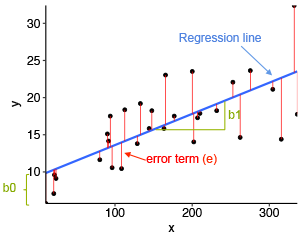


## Simple Linear Regression

For simple linear regression, the model can be represented by the following equation:

$$y = \beta_0 + \beta_1x + \epsilon$$

Where:
- $y$ is the dependent variable (target variable)
- $x$ is the independent variable (input feature)
- $\beta_0$ is the intercept (the value of $y$ when $x=0$)
- $\beta_1$ is the slope (the change in $y$ for a unit change in $x$)
- $\epsilon$ is the error term (difference between the predicted and actual values)

For multiple linear regression, the equation is:

$$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n + \epsilon$$

Where:
- $n$ is the number of input features
- $x_i$ is the $i^{th}$ input feature
- $\beta_i$ is the coefficient of the $i^{th}$ input feature



## Multiple Linear Regression

Multiple Linear Regression is an extension of Simple Linear Regression, where we model the relationship between multiple input features (independent variables) and a single output feature (dependent variable). The objective of this algorithm is to find the best-fitting line that minimizes the sum of the squared errors between the predicted and actual values.

The equation for Multiple Linear Regression is:

$$
y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n + \epsilon
$$


Where:
- $n$ is the number of input features
- $x_i$ is the $i^{th}$ input feature
- $\beta_i$ is the coefficient of the $i^{th}$ input feature

## Model Explanation

The goal of linear regression is to find the best-fitting line that minimizes the sum of the squared errors between the predicted values and the actual values. This is achieved by minimizing the following cost function:

$$J(\beta) = \frac{1}{2m} \sum_{i=1}^m (h_{\beta}(x^{(i)}) - y^{(i)})^2$$

Where:
- $m$ is the number of training examples
- $x^{(i)}$ is the $i^{th}$ input example
- $y^{(i)}$ is the actual value of the target variable for the $i^{th}$ example
- $h_{\beta}(x)$ is the hypothesis function, representing the predicted value of $y$ given the input $x$ and the current values of the coefficients $\beta$

The coefficients $\beta$ can be estimated using various optimization algorithms, such as gradient descent or the normal equation.

We can use optimization techniques such as the Normal Equation to find the optimal values for the coefficients $\beta_i$. 

After fitting the model to the data, we can use it to make predictions on new, unseen data and evaluate the performance of the model using metrics like Mean Squared Error (MSE), Root Mean Squared Error (RMSE), or R-squared ($R^2$) score.


## Application on Datasets
- Fish dataset (Simple LR)
- House price data (Multiple LR)


### Fish Dataset
This application separates the features and target variable, splits the data into training and testing sets, trains a linear regression model, makes predictions, and evaluates the model using mean squared error(MSE) and $R^2$ score.

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('fish.csv')

X = data.drop(columns=['Species', 'Weight'])
y = data['Weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 16763.89
R^2 Score: 0.88


In [10]:
import matplotlib.pyplot as plt

comparison_data = X_test.copy()
comparison_data['Actual_Weight'] = y_test
comparison_data['Predicted_Weight'] = y_pred

print(comparison_data.head(10))


     Length1  Length2  Length3   Height   Width  Actual_Weight  \
78      16.8     18.7     19.4   5.1992  3.1234           78.0   
155     11.7     12.4     13.5   2.4300  1.2690           13.4   
128     30.0     32.3     34.8   5.5680  3.3756          200.0   
55      23.6     26.0     28.7   8.3804  4.2476          270.0   
94      21.0     23.0     24.5   5.2185  3.6260          150.0   
29      33.5     37.0     42.6  18.9570  6.6030         1000.0   
147     10.1     10.6     11.6   1.7284  1.1484            7.0   
51      23.6     25.2     27.9   7.0866  3.9060          180.0   
98      22.6     24.6     26.2   6.7334  4.1658          188.0   
141     52.0     56.0     59.7  10.6863  6.9849         1250.0   

     Predicted_Weight  
78          77.685633  
155       -159.124606  
128        385.167355  
55         300.261194  
94         179.410232  
29         775.667262  
147       -214.434155  
51         274.909638  
98         268.445110  
141       1116.011532  


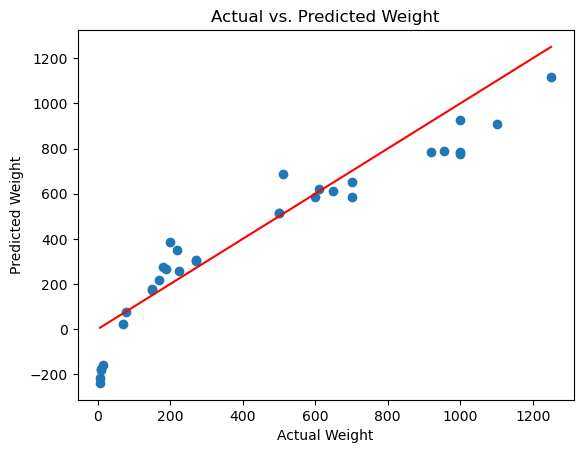

In [11]:
plt.scatter(comparison_data['Actual_Weight'], comparison_data['Predicted_Weight'])
plt.xlabel('Actual Weight')
plt.ylabel('Predicted Weight')
plt.title('Actual vs. Predicted Weight')


plt.plot([min(comparison_data['Actual_Weight']), max(comparison_data['Actual_Weight'])], [min(comparison_data['Actual_Weight']), max(comparison_data['Actual_Weight'])], color='red')

plt.show()


### House Price Dataset

This application shows both the actual house prices (y) and the predicted house prices (pre_y) as a function of the feature values.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [13]:
data = pd.read_csv("house price.csv")

data.dropna(inplace=True)

X = data.drop("price", axis=1)
y = data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

Mean squared error: 99786223089.67398
R-squared: 0.6993344374021988


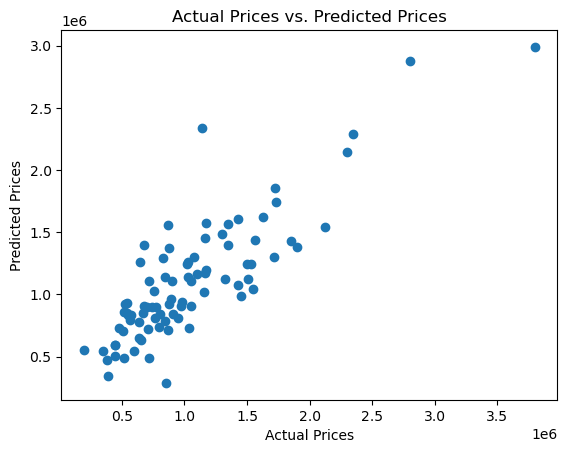

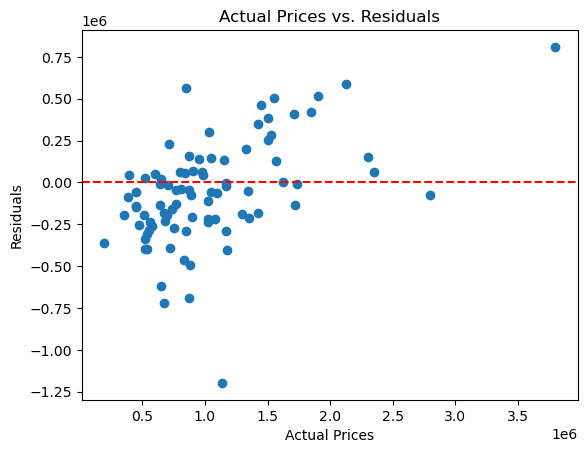

In [7]:
print("Mean squared error:", mse)
print("R-squared:", r2)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.xlabel("Actual Prices")
plt.ylabel("Residuals")
plt.title("Actual Prices vs. Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()